In [2]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [4]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [5]:
from sklearn.neighbors import KNeighborsRegressor

kn = KNeighborsRegressor(n_neighbors=3)

kn.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [6]:
kn.predict([[50]])

array([1033.33333333])

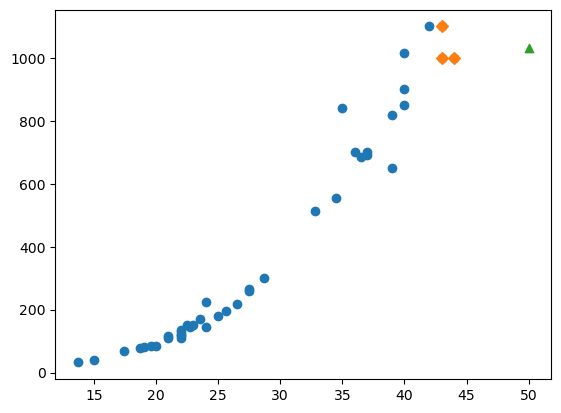

In [7]:
import matplotlib.pyplot as plt

distance, indexes = kn.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker="D")

plt.scatter(50,1033, marker="^")

In [8]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [9]:
print(kn.predict([[100]]))

[1033.33333333]


**Limit of KNN**

it's same with model prediction


if sample's value over than train sets, it may predict other value



<h1>Linear Regression</h1>

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input,train_target)

LinearRegression()

In [11]:
print(lr.predict([[50]]))

[1241.83860323]


y=Ax+B

a : lr.coef_

b : lr.intercept_

In [12]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


In [14]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


<h3>polynomial regression<h3>

In [35]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [36]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2,50]]))

[1573.98423528]


In [37]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


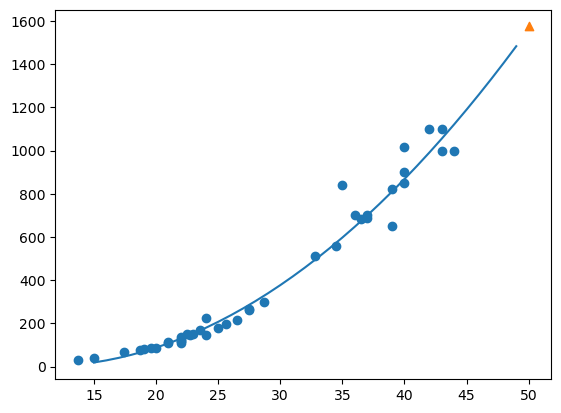

In [38]:
point = np.arange(15, 50)

plt.scatter(train_input, train_target)

#poly graph
plt.plot(point, 1.01*point**2 - 21.6*point+ 116.05)

plt.scatter(50,1574, marker="^")

In [39]:
lr.score(train_poly, train_target)

0.9706807451768623

In [41]:
lr.score(test_poly,test_target)

0.9775935108325121